## The Age of the Earth and our Solar System

In this lab, we will determine the age of our Earth and Solar System and we will learn how to do a bit of python coding! 

I will provide an example of how to write some code to determine the age of an object the Rb-Sr decay system and an isochron. Then, you will use your own code to write some code to estimate the age of the Earth using the U-Pb decay system. 

But first we need to set up some this python notebook. 


We are going to start by importing a couple of important modules -- numpy (for making some calculations) and matplotlib (for making graphs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

And then we need to define some variables so that our graphs look nice. 

In [2]:
# ──────────────────────────────────────────────────────────────
# global style
# ──────────────────────────────────────────────────────────────
plt.rcParams.update({
    "axes.titlelocation": "left",
    "axes.titlepad": 10,
    "legend.frameon": False,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "axes.grid": True,
    "grid.color": "0.8",
    "grid.linestyle": "-",
    "grid.alpha": 0.25,
    "svg.fonttype": "none",
    "pdf.fonttype": 42,
    "font.family": "Arial",
})


### Guided Isochron Demo — Rb–Sr whole rocks (Montara tonalite, Salinian)

**What you'll learn about Python (fast!)**
 - Running cells, variables, lists/tuples/dicts, NumPy arrays
 - Printing with f-strings
 - Writing your own function
 - Linear regression with `numpy.polyfit`
 - Plotting with Matplotlib (Tufte/minimal style)
 - Saving figures

**What you'll learn about geochronology**
- Build an Rb–Sr whole-rock isochron: `y = a + m x`
- Convert slope → age with:  `m = exp(λT) - 1  ⇒  T = ln(1+m)/λ`
- See how the decay constant choice affects age

#### Dataset: USGS Montara tonalite (Kistler & Champion, 2001, OFR 01-453)
We'll use a coherent subset that forms a tidy line.



##### 1) Data as Python lists (then → NumPy arrays)
A *list* is an ordered collection. We'll store each row as a tuple:
`(sample_name, 87Rb/86Sr, 87Sr/86Sr)`.

In [3]:

# Rb–Sr whole rocks (Montara tonalite, Salinian) — (x = 87Rb/86Sr, y = 87Sr/86Sr)
data = [
    (0.781, 0.70769),
    (0.309, 0.70695),
    (0.150, 0.70663),
    (0.301, 0.70667),
    (0.385, 0.70731),
    (0.315, 0.70720),
]

# Quick print (now we just enumerate the samples)
# This is unnecessary, but it is helpful to see the data sometimes. 
print("DATA — Rb–Sr whole rocks (Montara tonalite, Salinian)")
print("{:<10s} {:>12s} {:>14s}".format("Sample","#87Rb/86Sr (x)","#87Sr/86Sr (y)"))
for i, (xr, yr) in enumerate(data, start=1):
    print("{:<10s} {:>12.3f} {:>14.5f}".format(f"S{i}", xr, yr))

# Convert to NumPy arrays for math
x = np.array([row[0] for row in data])  # 87Rb/86Sr
y = np.array([row[1] for row in data])  # 87Sr/86Sr



DATA — Rb–Sr whole rocks (Montara tonalite, Salinian)
Sample     #87Rb/86Sr (x) #87Sr/86Sr (y)
S1                0.781        0.70769
S2                0.309        0.70695
S3                0.150        0.70663
S4                0.301        0.70667
S5                0.385        0.70731
S6                0.315        0.70720


##### 2) Fit the isochron: `y = a + m x`
np.polyfit(x, y, 1) performs an ordinary least squares fit of a degree-1 polynomial (a straight line) to the data, minimizing the sum of squared vertical residuals between observed y and modeled a + m x. 

In [4]:
m, a = np.polyfit(x, y, 1)

# This is just to see what the values are.
print("\nSTEP 1 — Linear isochron:  y = a + m x")
print(f"   Slope m = {m:.6f}")
print(f"   Intercept a = {a:.6f}   (≈ initial 87Sr/86Sr)")


STEP 1 — Linear isochron:  y = a + m x
   Slope m = 0.001672
   Intercept a = 0.706450   (≈ initial 87Sr/86Sr)



##### 3) Convert slope → age (Rb–Sr single-parent)
Relation:  `m = exp(λT) − 1`  ⇒  `T = ln(1+m)/λ`

We'll use two λ values to show sensitivity:
- `λ_paper  = 1.402e-11 yr^-1` (common in older papers)
- `λ_modern = 1.3972e-11 yr^-1` (modern recommended)

 **Beginner Python tip:** We'll write a tiny function to compute age from `m` and `λ`.
 (this is kind of silly because it doesnt do very much (it is one line of code), but you can at least see how to write a function if you want).


In [9]:
def rbsr_age_from_slope(m, lam_per_year):
    """Return age in Ma given slope m and decay constant lam (per year)."""
    T_years = np.log1p(m) / lam_per_year
    return T_years / 1e6  # convert to Ma

lam_paper  = 1.402e-11   # yr^-1
lam_modern = 1.3972e-11  # yr^-1

T_paper_Ma  = rbsr_age_from_slope(m, lam_paper)
T_modern_Ma = rbsr_age_from_slope(m, lam_modern)

print("\nSTEP 2 — Age from slope (Rb–Sr single-parent)")
print("   Equation:  m = exp(λ T) − 1   ⇒   T = ln(1 + m)/λ")
print(f"   Using λ_paper  = 1.402×10^-11 yr^-1  →  T ≈ {T_paper_Ma:.1f} Ma")
print(f"   Using λ_modern = 1.3972×10^-11 yr^-1 →  T ≈ {T_modern_Ma:.1f} Ma")


STEP 2 — Age from slope (Rb–Sr single-parent)
   Equation:  m = exp(λ T) − 1   ⇒   T = ln(1 + m)/λ
   Using λ_paper  = 1.402×10^-11 yr^-1  →  T ≈ 119.2 Ma
   Using λ_modern = 1.3972×10^-11 yr^-1 →  T ≈ 119.6 Ma



##### Try it
- Change `lam_paper` a little (e.g., `1.395e-11`) and re-run the cell.
- What happens to the age? Why?

##### 4) Tufte-style plot (minimal ink, direct labels)
 Tips:
 - One figure, no legend. Label points directly.
 - Thin line, no boxy backgrounds.
 - Save PNG/PDF/SVG for your report.

The data for this first example comes from Carlson et al., 2014. 

They used a norite sample returned from the  samples returned from thw Apollo 17 mission to the moon. Norite primarily is composed of plagioclase and pyroxene, so Carlson et al., 2014 measured the Rb/Sr  ratios of individual phases as well as 

In [10]:
# Build best-fit line across x-range (+ small margin)
xx = np.linspace(x.min()*0.95, x.max()*1.05, 200)
yy = a + m*xx

now, lets make a graph

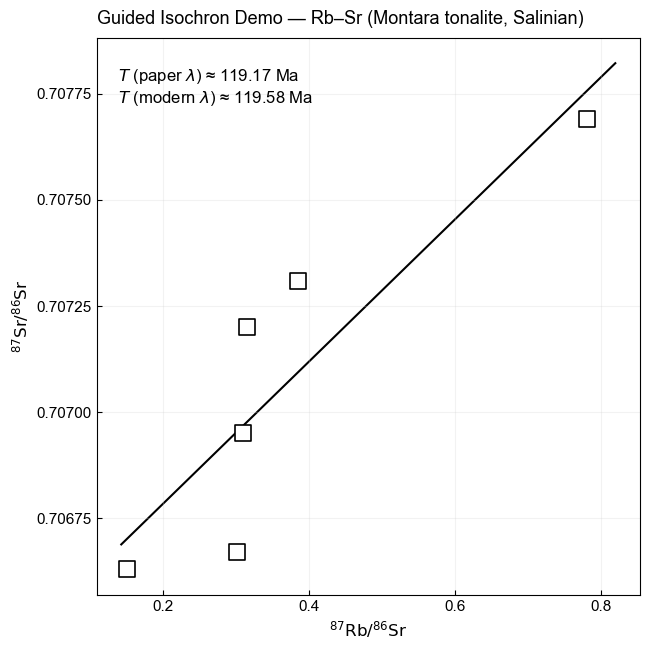

In [16]:
plt.figure(figsize=(6.6, 6.6))
ax = plt.gca()

# Draw the best-fit line FIRST so it sits behind the points
ax.plot(xx, yy, linewidth=1.5, color='k', zorder=1)

# Draw the points AFTER (bigger squares, on top of line)
ax.scatter(
    x, y,
    s=130,                    # ← a bit larger
    marker='s',
    facecolor='white',        # filled white so it masks the line
    edgecolors='k',
    linewidths=1.2,
    zorder=3                  # ← above the line
)

# Minimal axes and title
ax.set_xlabel(r"$^{87}\mathrm{Rb}/^{86}\mathrm{Sr}$", fontsize=12)
ax.set_ylabel(r"$^{87}\mathrm{Sr}/^{86}\mathrm{Sr}$", fontsize=12)
ax.set_title("Guided Isochron Demo — Rb–Sr (Montara tonalite, Salinian)", fontsize=13)
ax.tick_params(axis="both", which="major", labelsize=11)
ax.locator_params(nbins=6)

# Findings text
txt = (
    f"\n$T$ (paper $\\lambda$) ≈ {T_paper_Ma:.2f} Ma"
    f"\n$T$ (modern $\\lambda$) ≈ {T_modern_Ma:.2f} Ma"
)
ax.text(0.04, 0.98, txt, transform=ax.transAxes, va="top", ha="left", fontsize=12)

plt.tight_layout()
plt.savefig("montara_rbsr_isochron_tufte.png", dpi=300)
plt.savefig("montara_rbsr_isochron_tufte.pdf")
plt.savefig("montara_rbsr_isochron_tufte.svg")
plt.show()


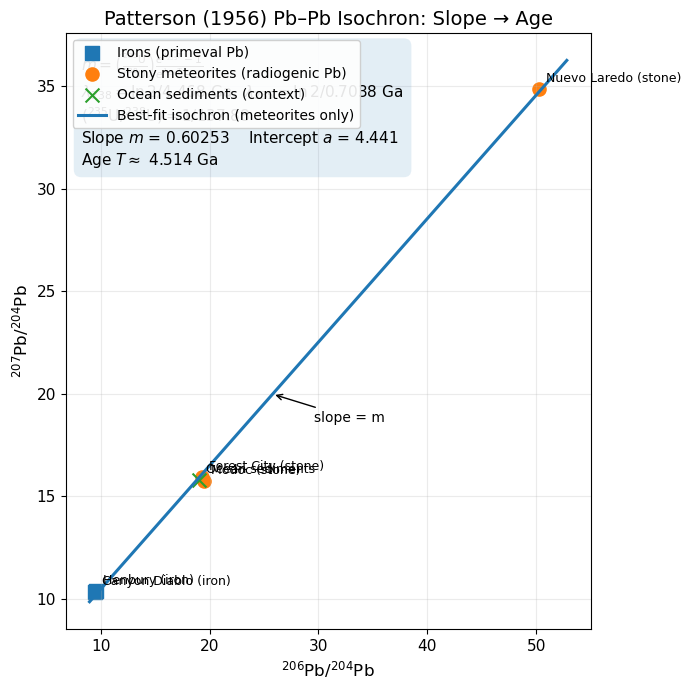

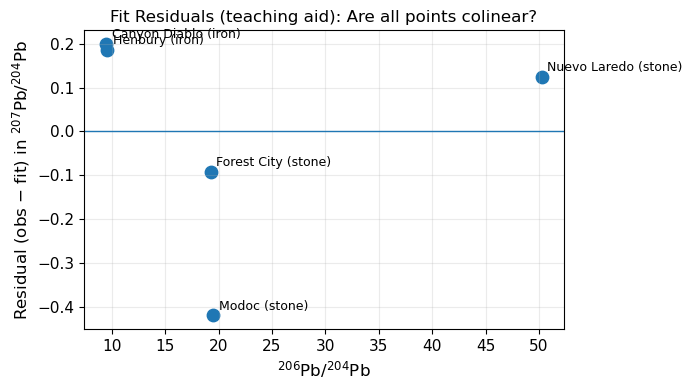

Slope m = 0.602525, intercept a = 4.441, Age ≈ 4.514 Ga


In [ ]:
"""
Patterson (1956) Pb–Pb Isochron (Teaching Version)

Slope–age relation (correct):
    m = (235U/238U) * (exp(λ235*T) - 1) / (exp(λ238*T) - 1)

Where:
    λ238 = ln(2)/4.468 Ga
    λ235 = ln(2)/0.7038 Ga
    (235U/238U) = 1/137.88  (present-day natural ratio)

Outputs:
    - patterson_isochron_teaching_v2.{png,pdf,svg}
    - patterson_isochron_residuals_v2.{png,pdf,svg}
"""


# ---------------------------
# Patterson-era meteorite data
# ---------------------------
irons = [
    ("Canyon Diablo (iron)",  9.46, 10.34),
    ("Henbury (iron)",        9.55, 10.381),
]
stones = [
    ("Forest City (stone)",  19.27, 15.96),
    ("Modoc (stone)",        19.48, 15.76),
    ("Nuevo Laredo (stone)", 50.28, 34.86),
]
# Context (not used in fit)
ocean = ("Ocean sediments", 19.0, 15.8)

# Pack meteorite data for fitting
data_meta = irons + stones
x = np.array([d[1] for d in data_meta])  # 206Pb/204Pb
y = np.array([d[2] for d in data_meta])  # 207Pb/204Pb
names = [d[0] for d in data_meta]

# ---------------------------
# Linear fit: y = a + m x
# ---------------------------
m, a = np.polyfit(x, y, 1)

# ---------------------------
# Age from slope
# m = R * (exp(l235*T) - 1)/(exp(l238*T) - 1)
# ---------------------------
# Half-lives (years)
t238 = 4.468e9
t235 = 0.7038e9
l238 = np.log(2) / t238
l235 = np.log(2) / t235

# Present-day 235U/238U ratio
R = 1.0 / 137.88  # ≈ 0.007252

# Solve g(T) = expm1(l235*T)/expm1(l238*T) - m/R = 0 by bisection
target = m / R

def ratio_noR(T):
    return np.expm1(l235*T) / np.expm1(l238*T)

def g(T):
    return ratio_noR(T) - target

lo, hi = 1e6, 6.0e9  # bracket 1 Myr .. 6 Gyr
for _ in range(200):
    mid = 0.5*(lo + hi)
    if g(lo) * g(mid) <= 0:
        hi = mid
    else:
        lo = mid
T_years = 0.5*(lo + hi)
T_Ga = T_years / 1e9

# ---------------------------
# Plot 1: Isochron with callouts
# ---------------------------
fig = plt.figure(figsize=(7, 7))
ax = plt.gca()

# Grouped scatters
xi = np.array([d[1] for d in irons]);  yi = np.array([d[2] for d in irons])
xs = np.array([d[1] for d in stones]); ys = np.array([d[2] for d in stones])

ax.scatter(xi, yi, s=90, marker="s", label="Irons (primeval Pb)")
ax.scatter(xs, ys, s=90, marker="o", label="Stony meteorites (radiogenic Pb)")
ax.scatter([ocean[1]], [ocean[2]], s=100, marker="x", label="Ocean sediments (context)")

# Best-fit line
x_line = np.linspace(x.min()*0.95, x.max()*1.05, 400)
y_line = a + m * x_line
ax.plot(x_line, y_line, linewidth=2.2, label="Best-fit isochron (meteorites only)")

# Labels (small offset)
def annotate_points(xs_, ys_, labels_, dx=5, dy=5):
    for x0, y0, lab in zip(xs_, ys_, labels_):
        ax.annotate(lab, (x0, y0), xytext=(dx, dy),
                    textcoords="offset points", fontsize=9)

annotate_points(xi, yi, [d[0] for d in irons])
annotate_points(xs, ys, [d[0] for d in stones])
ax.annotate(ocean[0], (ocean[1], ocean[2]),
            xytext=(5, 5), textcoords="offset points", fontsize=9)

# Axes + title
ax.set_xlabel(r"$^{206}\mathrm{Pb}/^{204}\mathrm{Pb}$", fontsize=12)
ax.set_ylabel(r"$^{207}\mathrm{Pb}/^{204}\mathrm{Pb}$", fontsize=12)
ax.set_title("Patterson (1956) Pb–Pb Isochron: Slope → Age", fontsize=14)
ax.grid(True, which="both", alpha=0.25)
ax.tick_params(axis='both', which='major', labelsize=11)

# Explanatory callout
eq_text = (
    r"$m=\left(\frac{{}^{235}\mathrm{U}}{{}^{238}\mathrm{U}}\right)"
    r"\frac{e^{\lambda_{235}T}-1}{e^{\lambda_{238}T}-1}$" + "\n"
    + r"$\lambda_{238}=\ln 2/4.468\ \mathrm{Ga},\ "
      r"\lambda_{235}=\ln 2/0.7038\ \mathrm{Ga}$" + "\n"
    + r"$\left({}^{235}\mathrm{U}/{}^{238}\mathrm{U}\right)=1/137.88$" + "\n"
    + f"Slope $m$ = {m:.5f}    Intercept $a$ = {a:.3f}\n"
    + f"Age $T \\approx$ {T_Ga:.3f} Ga"
)
ax.text(0.03, 0.97, eq_text, transform=ax.transAxes, fontsize=11,
        va="top", ha="left",
        bbox=dict(boxstyle="round", alpha=0.12, ec="none", pad=0.5))

# Slope intuition arrow
xm = 0.6*(x.min()) + 0.4*(x.max())
ym = a + m*xm
ax.annotate("slope = m", xy=(xm, ym), xytext=(30, -20),
            textcoords="offset points", arrowprops=dict(arrowstyle="->", lw=1))

ax.legend(framealpha=0.9, fontsize=10, loc="upper left")

plt.tight_layout()
plt.savefig("patterson_isochron_teaching_v2.png", dpi=300)
plt.savefig("patterson_isochron_teaching_v2.pdf")
plt.savefig("patterson_isochron_teaching_v2.svg")
plt.show()

# ---------------------------
# Plot 2: Residuals (obs − fit)
# ---------------------------
residuals = y - (a + m*x)

fig2 = plt.figure(figsize=(7, 4))
ax2 = plt.gca()
ax2.axhline(0, linewidth=1)
ax2.scatter(x, residuals, s=80)
for x0, r0, lab in zip(x, residuals, names):
    ax2.annotate(lab, (x0, r0), xytext=(4, 4),
                 textcoords="offset points", fontsize=9)

ax2.set_xlabel(r"$^{206}\mathrm{Pb}/^{204}\mathrm{Pb}$", fontsize=12)
ax2.set_ylabel("Residual (obs − fit) in " + r"$^{207}\mathrm{Pb}/^{204}\mathrm{Pb}$", fontsize=12)
ax2.set_title("Fit Residuals (teaching aid): Are all points colinear?")
ax2.grid(True, which="both", alpha=0.25)
ax2.tick_params(axis='both', which='major', labelsize=11)

plt.tight_layout()
plt.savefig("patterson_isochron_residuals_v2.png", dpi=300)
plt.savefig("patterson_isochron_residuals_v2.pdf")
plt.savefig("patterson_isochron_residuals_v2.svg")
plt.show()

print(f"Slope m = {m:.6f}, intercept a = {a:.3f}, Age ≈ {T_Ga:.3f} Ga")


In [ ]:
"""
Rb–Sr isochron (Carlson et al., 2014) — Apollo 17 norite 77215 minerals
- Plot only the three points used in the internal fit
- Tufte-style figure (minimal ink)
- Print table + step-by-step equations/results
"""
# -----------------------------
# Data: Table 2 (Carlson et al., 2014)
# 77215 internal mineral set (used for the isochron fit)
# -----------------------------
data = [
    ("Whole Rock",   0.0884, 0.704723),  # x = 87Rb/86Sr, y = 87Sr/86Sr
    ("Plagioclase", 0.4041, 0.724811),
    ("Pyroxene",    0.0483, 0.702287),
]

# Print table
print("DATA (Carlson et al., 2014 — Apollo 17 norite 77215, internal set)")
print("{:<20s} {:>14s} {:>16s}".format("Sample", "87Rb/86Sr (x)", "87Sr/86Sr (y)"))
for name, xr, yr in data:
    print("{:<20s} {:>14.4f} {:>16.6f}".format(name, xr, yr))

# Arrays for fit
names = [d[0] for d in data]
x = np.array([d[1] for d in data])  # 87Rb/86Sr
y = np.array([d[2] for d in data])  # 87Sr/86Sr

# -----------------------------
# STEP 1: linear fit  y = a + m x
# -----------------------------
m, a = np.polyfit(x, y, 1)

print("\nSTEP 1 — Linear isochron fit:  y = a + m x")
print("   (ordinary least squares via numpy.polyfit)")
print(f"   Slope  m = {m:.6f}")
print(f"   Intercept a = {a:.6f}")

# -----------------------------
# STEP 2: convert slope to age (Rb–Sr single-parent isochron)
#   m = exp(λ T) − 1  ⇒  T = ln(1 + m)/λ
# Report with both the paper’s λ and a modern recommended λ.
# -----------------------------
lam_paper  = 1.402e-11   # yr^-1 (used in Carlson et al., 2014)
lam_modern = 1.3972e-11  # yr^-1 (e.g., Villa et al., 2015)

T_paper_Ga  = np.log1p(m) / lam_paper  / 1e9
T_modern_Ga = np.log1p(m) / lam_modern / 1e9

print("\nSTEP 2 — Age from slope (Rb–Sr single-parent isochron)")
print("   Equation:  m = exp(λ T) − 1   ⇒   T = ln(1 + m)/λ")
print(f"   Using λ_paper  = 1.402×10^-11 yr^-1  ⇒  T ≈ {T_paper_Ga:.2f} Ga")
print(f"   Using λ_modern = 1.3972×10^-11 yr^-1 ⇒  T ≈ {T_modern_Ga:.2f} Ga")

# -----------------------------
# Tufte-style plot
# -----------------------------
fig = plt.figure(figsize=(6.6, 6.6))
ax = plt.gca()



# Best-fit line across x-range (+ small margin)
xx = np.linspace(x.min()*0.95, x.max()*1.05, 200)
yy = a + m*xx
ax.plot(xx, yy, linewidth=1.5, color = 'k')

# Points (no legend; direct labels)
ax.scatter(x, y, s=85, facecolor = "white", edgecolor = 'k', marker = 's')
for xi, yi, lab in zip(x, y, names):
    ax.annotate(lab, (xi, yi), xytext=(5, 5),
                textcoords="offset points", fontsize=9)

# Minimal axes
ax.set_xlabel(r"$^{87}\mathrm{Rb}/^{86}\mathrm{Sr}$", fontsize=12)
ax.set_ylabel(r"$^{87}\mathrm{Sr}/^{86}\mathrm{Sr}$", fontsize=12)
ax.set_title("Rb–Sr Isochron — Apollo 17 Norite 77215 (Carlson et al., 2014)", fontsize=13)
ax.set_xlim([0, 0.5])
ax.set_ylim([0.7, 0.728])
ax.tick_params(axis="both", which="major", labelsize=11)
ax.locator_params(nbins=6)

# Small, unobtrusive math summary
txt = (r"$y=a+m x$   (fit)"
       "\n" r"$m=e^{\lambda T}-1 \;\Rightarrow\; T=\ln(1+m)/\lambda$"
       f"\n$m={m:.5f}$,  $a={a:.6f}$"
       f"\n$T$ (paper $\\lambda$) ≈ {T_paper_Ga:.2f} Ga"
       f"\n$T$ (modern $\\lambda$) ≈ {T_modern_Ga:.2f} Ga")
ax.text(0.02, 0.98, txt, transform=ax.transAxes,
        va="top", ha="left", fontsize=10)

plt.tight_layout()
plt.savefig("carlson2014_rb_sr_77215_isochron_tufte.png", dpi=300)
plt.savefig("carlson2014_rb_sr_77215_isochron_tufte.pdf")
plt.savefig("carlson2014_rb_sr_77215_isochron_tufte.svg")
plt.show()
